# NN weights visualisation

Inspired by [this post](https://stackoverflow.com/a/33720100/9136498, "StackOverflow") on StackOverflow.

In [2]:
from matplotlib import pyplot
from math import cos, sin, atan


class Neuron():
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def draw(self):
        circle = pyplot.Circle((self.x, self.y), radius=neuron_radius, fill=False)
        pyplot.gca().add_patch(circle)


class Layer():
    def __init__(self, network, number_of_neurons, weights):
        self.previous_layer = self.__get_previous_layer(network)
        self.y = self.__calculate_layer_y_position()
        self.neurons = self.__intialise_neurons(number_of_neurons)
        self.weights = weights

    def __intialise_neurons(self, number_of_neurons):
        neurons = []
        x = self.__calculate_left_margin_so_layer_is_centered(number_of_neurons)
        for iteration in range(number_of_neurons):
            neuron = Neuron(x, self.y)
            neurons.append(neuron)
            x += horizontal_distance_between_neurons
        return neurons

    def __calculate_left_margin_so_layer_is_centered(self, number_of_neurons):
        return horizontal_distance_between_neurons * (number_of_neurons_in_widest_layer - number_of_neurons) / 2

    def __calculate_layer_y_position(self):
        if self.previous_layer:
            return self.previous_layer.y + vertical_distance_between_layers
        else:
            return 0

    def __get_previous_layer(self, network):
        if len(network.layers) > 0:
            return network.layers[-1]
        else:
            return None

    def __line_between_two_neurons(self, neuron1, neuron2, _linewidth, asGraph):
        angle = atan((neuron2.x - neuron1.x) / float(neuron2.y - neuron1.y))
        x_adjustment = neuron_radius * sin(angle)
        y_adjustment = neuron_radius * cos(angle)
        line_x_data = (neuron1.x - x_adjustment, neuron2.x + x_adjustment)
        line_y_data = (neuron1.y - y_adjustment, neuron2.y + y_adjustment)
        if (asGraph == False):
            if (_linewidth <= 0):
                line = pyplot.Line2D(line_x_data, 
                                     line_y_data, 
                                     color='r',
                                     linewidth=_linewidth*1.5)
                                     #linewidth=0.3)
            else:
                line = pyplot.Line2D(line_x_data, 
                                     line_y_data, 
                                     color='g',
                                     linewidth=_linewidth*1.5)
                                     #linewidth=0.3)
            #end
        else:
            line = pyplot.Line2D(line_x_data,
                                 line_y_data,
                                 color = 'b',
                                 linewidth = 0.3*_linewidth)
        #end            
        pyplot.gca().add_line(line)
    def draw(self, asGraph):
        for this_layer_neuron_index in range(len(self.neurons)):
            neuron = self.neurons[this_layer_neuron_index]
            neuron.draw()
            if self.previous_layer:
                for previous_layer_neuron_index in range(len(self.previous_layer.neurons)):
                    previous_layer_neuron = self.previous_layer.neurons[previous_layer_neuron_index]
                    weight = self.previous_layer.weights[this_layer_neuron_index, previous_layer_neuron_index]
                    self.__line_between_two_neurons(neuron, previous_layer_neuron, weight, asGraph)


class NeuralNetwork():
    def __init__(self, asGraph = False):
        self.layers = []
        self.asGraph = asGraph

    def add_layer(self, number_of_neurons, weights=None):
        layer = Layer(self, number_of_neurons, weights)
        self.layers.append(layer)

    def draw(self):
        for layer in self.layers:
            layer.draw(self.asGraph)
        pyplot.axis('scaled')
        pyplot.show()

## Weights load

Weights of the **trained** network are loaded and the subsequent analysis is performed on these. Later on, however, it is thought necessary to _binarize_ the weights in order to conform to the format outlined in [Kashtan and Alon, 2005](https://www.pnas.org/content/102/39/13773, "PNAS"). In this way it is possible to perform _motif_ detection.

In [3]:
import pickle
import numpy as np

fileID = open(r'C:\Users\Matteo\Desktop\MasterThesis\newThread\DS_model\weights_.pkl', 'rb')
weights = pickle.load(fileID)
fileID.close()

_weights = np.asarray(weights)
print(_weights[2].shape)

numLayers = int(_weights.shape[0]/2)
wghts = []
biases = []

for i in range(numLayers):
    j = 2*i
    print(j,(_weights[j].T).shape)
    wghts.append(_weights[j])
    j = 2*i + 1
    print(j,(_weights[j].T).shape)
    biases.append(_weights[j])

print(type(wghts[1]))
biases[0].shape
wghts = np.asarray(wghts)
wghts[2].shape

(20, 10)
0 (20, 31)
1 (20,)
2 (10, 20)
3 (10,)
4 (4, 10)
5 (4,)
<class 'numpy.ndarray'>


(10, 4)

(31, 20)
(20, 10)


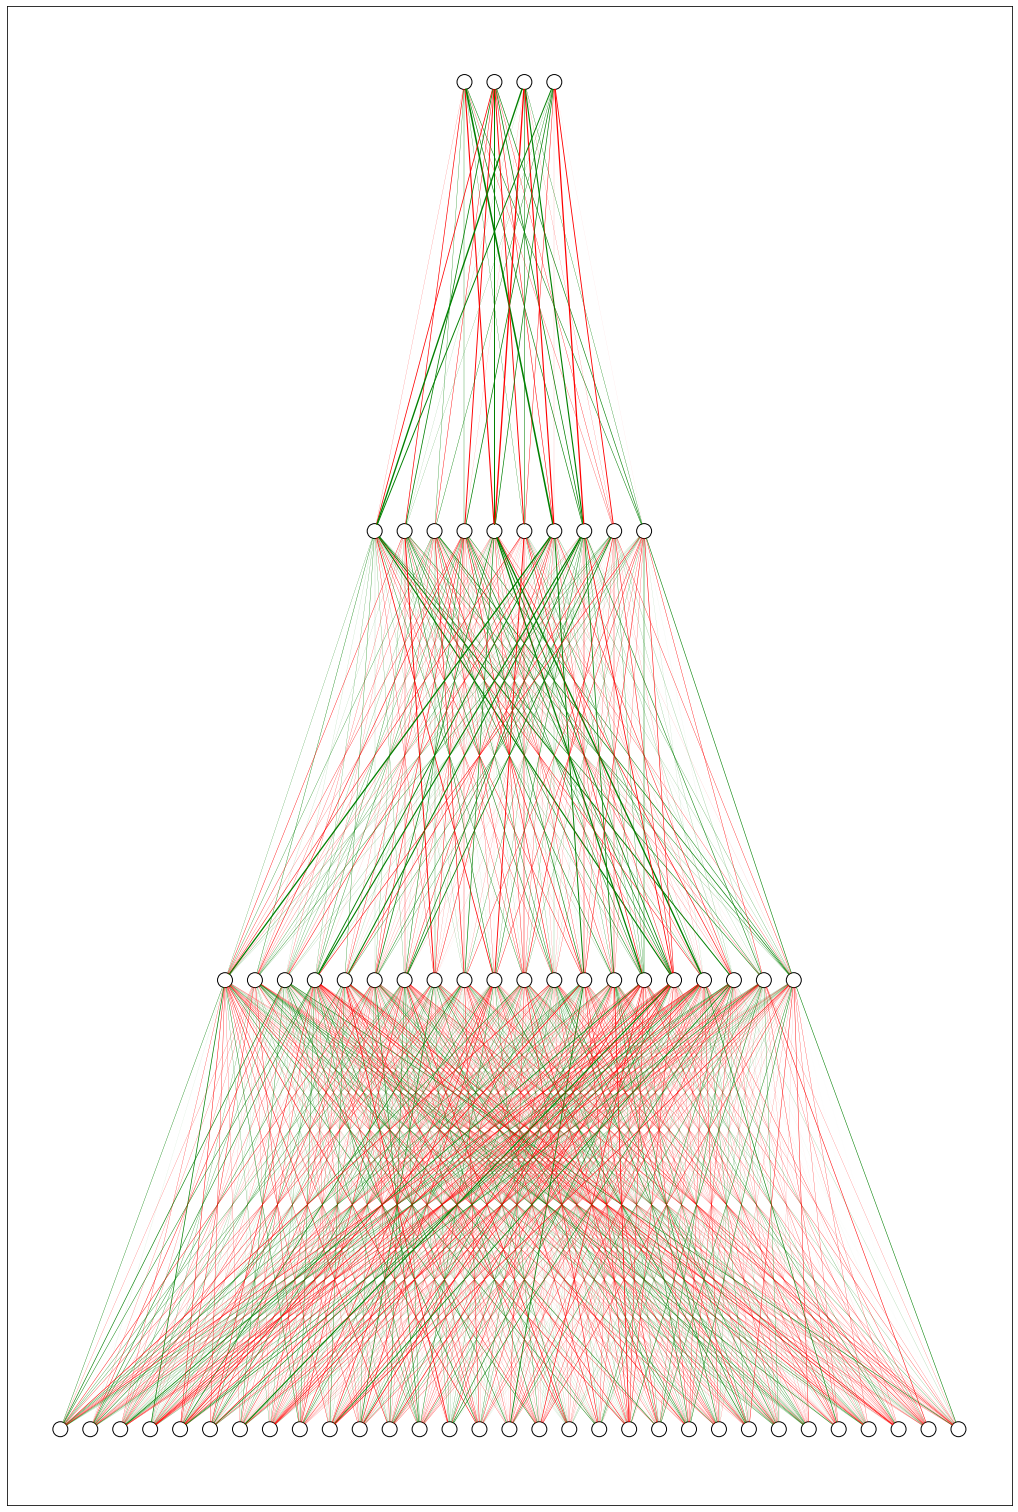

In [4]:

vertical_distance_between_layers = 30
horizontal_distance_between_neurons = 2
neuron_radius = 0.5
number_of_neurons_in_widest_layer = 31
network = NeuralNetwork(asGraph = False)
# weights to convert from 10 outputs to 4 (decimal digits to their binary representation)

pyplot.figure(figsize=(18,100))
fig = pyplot.gca()
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)


for i in range(numLayers-1):
    wghs = wghts[i]
    print(wghs.shape)
    network.add_layer((wghs.T).shape[1], wghs.T)
network.add_layer((wghts[-1].T).shape[1], wghts[-1].T)
network.add_layer((wghts[-1].T).shape[0])

network.draw()
pyplot.show()

# NN as Graph

Starting from weights it should be possible to derive a **graph** representation, such as $\mathcal{G} = \{ \mathcal{N}, \mathcal{E} \}$.

In the following cell, the commands to run the `mfinder1.2.exe` program ([Uri Alon webpage]("http://www.weizmann.ac.il/mcb/UriAlon/download/network-motif-software", "Weizmann Institute of Science")) in a nearby directory. Once the graph representation of the present work neural network is done, it can be fed to the aforementioned program.

In [ ]:
!echo %cd%
!..\UriAlon_mfinder_prog\mfinder1.2\mfinder1.2.exe ..\UriAlon_mfinder_prog\mfinder1.2\network_exmp.txt

### Graph representation of NN

In [8]:

layers = {}

nodes = np.arange(1,wghts[0].shape[0]+1)
dictTmp = {1 : nodes}
layers.update(dictTmp)

for i in range(1,numLayers):
    
    offset = layers[i][-1] + 1
    nodes = np.arange(offset, wghts[i].shape[0] + offset)
    dictTmp = {i+1 : nodes}
    layers.update({i+1 : nodes})
    
    if (i == numLayers-1):
        
        offset = layers[i+1][-1] + 1
        layers.update({i+2 : np.arange(offset, wghts[i].shape[1] + offset)})
    #end
#end

As long as I could not find a smarted way, explicit loops format is adopted. The network model, however, is not that crazy so, this far, such a paradigm is still sustainable.

The cutoff threshold is chosen according to the plots of the trained models weights, refer to the `NN_model.ipynb` notebook. Most of the links strengths crowd the region comprehended within the interval $(-0.4, +0.4)$, by quick visual inspection. It is thought wise to create another data structure for the binary links informations, since otherwise conflicts with the former may rise, if previous cells are run.

In [5]:
cutoff = 0.4

links = wghts

for k in range(wghts.shape[0]):
    for i in range(wghts[k].shape[0]):
        for j in range(wghts[k].shape[1]):
            if (wghts[k][i,j] <= -cutoff or wghts[k][i,j] >= cutoff):
                links[k][i,j] = 1
            else:
                links[k][i,j] = 0
            #end
        #end
    #end
#end

(31, 20)
(20, 10)


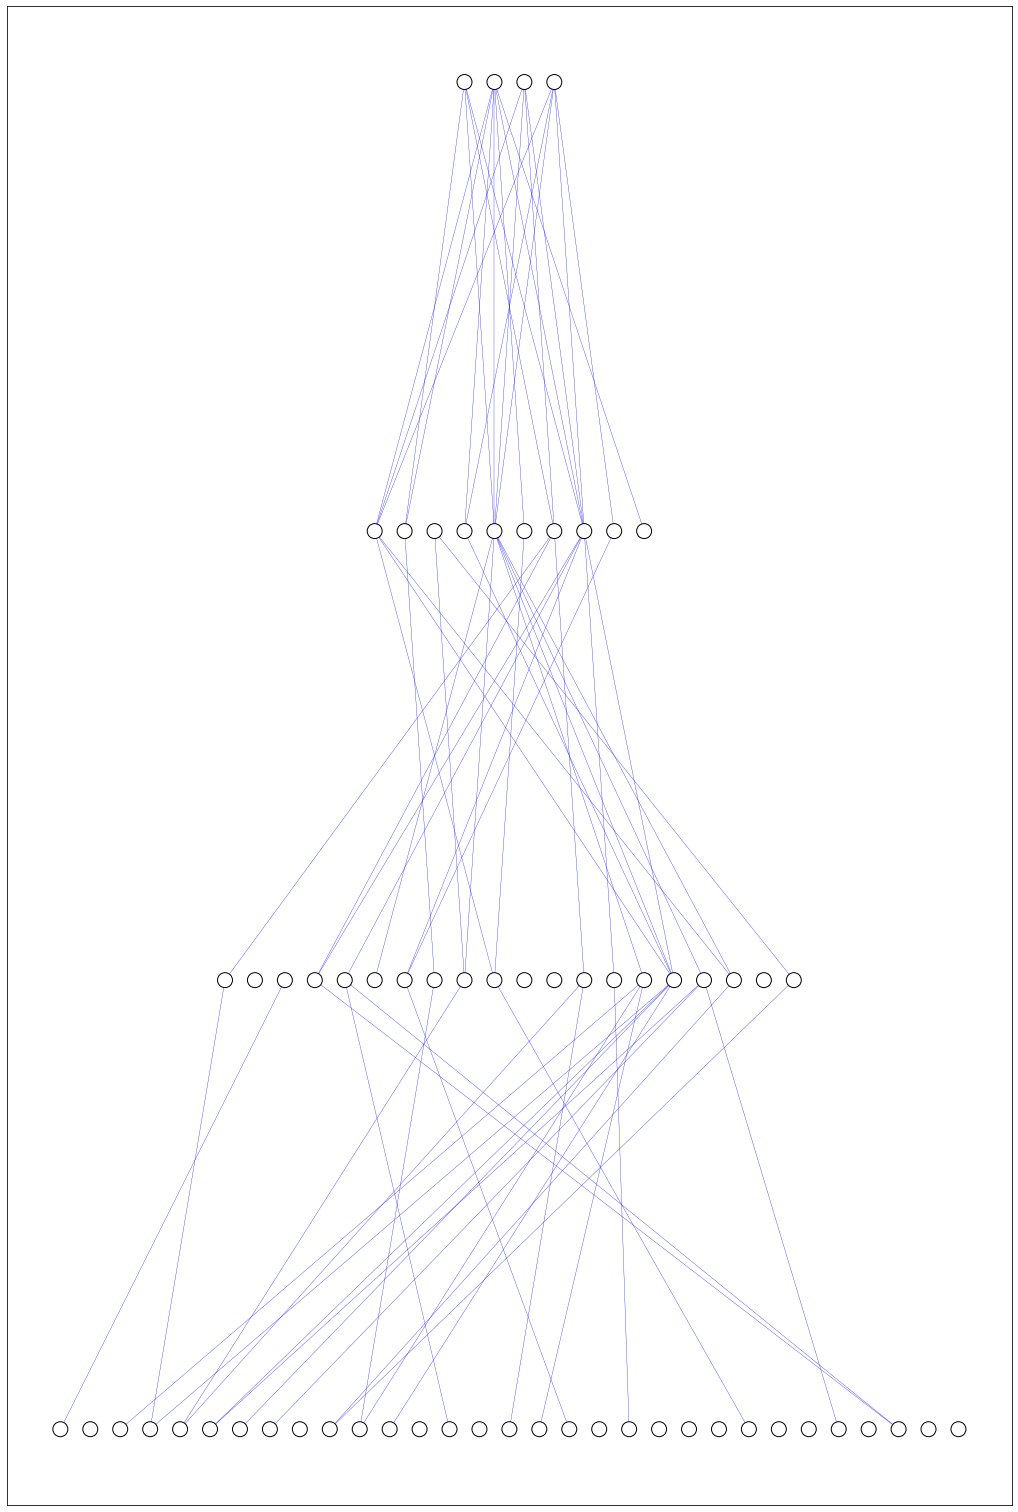

In [6]:
vertical_distance_between_layers = 30
horizontal_distance_between_neurons = 2
neuron_radius = 0.5
number_of_neurons_in_widest_layer = 31
network = NeuralNetwork(asGraph = True)
# weights to convert from 10 outputs to 4 (decimal digits to their binary representation)

pyplot.figure(figsize=(18,100))
fig = pyplot.gca()
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)


for i in range(numLayers-1):
    link = links[i]
    print(link.shape)
    network.add_layer((link.T).shape[1], link.T)
network.add_layer((links[-1].T).shape[1], links[-1].T)
network.add_layer((links[-1].T).shape[0])

network.draw()
pyplot.show()

In [9]:
AdjMat = []

"""
This following code produces adjacency lists. It's clever, but the mfinder1.2 program
wants one edge per row, so it suffices to save in a list the nodes pairs connected with
a link. In case adjacency list will be further needed, refer to this commented code.

sizeN = layers[numLayers][-1]
for k in range(sizeN):
    Adj = []
    AdjMat.append(Adj)


for k in range(numLayers):
    iRange = range(links[k].shape[0])
    jRange = range(links[k].shape[1])
    for i in iRange:
        for j in jRange:
            if (links[k][i,j] != 0.0):
                toAdd = layers[k+2][j]
                listElem = layers[k+1][i]
                AdjMat[listElem-1].append(toAdd)
#end

inputGraph = []
for k in range(len(AdjMat)):
    inputGraph.append([k+1, AdjMat[k], 1])
""" 

    
for k in range(numLayers):
    iRange = range(links[k].shape[0])
    jRange = range(links[k].shape[1])
    for i in iRange:
        for j in jRange:
            if (links[k][i,j] != 0.0):
                toAdd = layers[k+2][j]
                listElem = layers[k+1][i]
                AdjMat.append([listElem,toAdd,1])
#end

print(len(AdjMat))
print(AdjMat[0])

with open('inputGraph.txt', 'w') as f:
    for row in range(len(AdjMat)):
        f.write("%s\n" % AdjMat[row])

67
[1, 34, 1]


In [11]:
!inputGraph.txt

In [12]:
!echo %cd%
!..\UriAlon_mfinder_prog\mfinder1.2\mfinder1.2.exe inputGraph.txt -s 3

C:\Users\Matteo\Desktop\MasterThesis\newThread\DS_model
Input Network file is inputGraph.txt
mfinder Version 1.20

Loading Network
	Reading Network file in <Source,Target,Weight> Format
Searching motifs size 3
Processing Real network...

 (Real network processing runtime was:    0.0 seconds.)
Processing Random networks
..........
 Estimated run time left :      0 seconds.

..........
 Estimated run time left :      0 seconds.

..........
 Estimated run time left :      0 seconds.

..........
 Estimated run time left :      2 seconds.

..........
 Estimated run time left :      1 seconds.

..........
 Estimated run time left :      1 seconds.

..........
 Estimated run time left :      0 seconds.

..........
 Estimated run time left :      0 seconds.

..........
 Estimated run time left :      0 seconds.

..........
 Estimated run time left :      0 seconds.


Calculating Results...

MOTIF FINDER RESULTS:

	Network name: inputGraph.txt
	Network type: Directed
	Num of Nodes: 65 Num of Ed

In [15]:
!..\UriAlon_mfinder_prog\mfinder1.2\mfinder1.2.exe inputGraph.txt -s 4

Input Network file is inputGraph.txt
mfinder Version 1.20

Loading Network
	Reading Network file in <Source,Target,Weight> Format
Searching motifs size 4
Processing Real network...

 (Real network processing runtime was:    0.0 seconds.)
Processing Random networks
..........
 Estimated run time left :      9 seconds.

..........
 Estimated run time left :      4 seconds.

..........
 Estimated run time left :      5 seconds.

..........
 Estimated run time left :      3 seconds.

..........
 Estimated run time left :      3 seconds.

..........
 Estimated run time left :      3 seconds.

..........
 Estimated run time left :      2 seconds.

..........
 Estimated run time left :      1 seconds.

..........
 Estimated run time left :      1 seconds.

..........
 Estimated run time left :      0 seconds.


Calculating Results...

MOTIF FINDER RESULTS:

	Network name: inputGraph.txt
	Network type: Directed
	Num of Nodes: 65 Num of Edges: 67
	Num of Nodes with edges: 48
	Maximal out degree